<a href="https://colab.research.google.com/github/prethasur/yolo7/blob/main/Pow_YOLOv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! nvidia-smi

Fri Jan  6 14:13:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/powerT/yolov7

/content/drive/MyDrive/powerT/yolov7


In [ ]:
'''
!git clone https://github.com/WongKinYiu/yolov7.git       # clone
%cd yolov7
'''

In [ ]:
'''
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XgK3EwJ0nC4Rp1Z1hgBo")
project = rf.workspace("prethasprojects").project("tower-components")
dataset = project.version(1).download("yolov7")
'''

In [ ]:
# Algorithm:
# Setting up full paths --> List of paths -->
# --> Extracting 15% of paths to save into test.txt file -->
# --> Writing paths into train and test txt files
#
# Result:
# Files train.txt and test.txt with full paths to images


# Importing needed library
import os

full_path_to_images = '/content/drive/MyDrive/powerT/yolov7/custom_dataset/images/train'

os.chdir(full_path_to_images)

# Check point
# Getting the current directory
# print(os.getcwd())

# Defining list to write paths in
p = []

# Using os.walk for going through all directories
# and files in them from the current directory
# Fullstop in os.walk('.') means the current directory
for current_dir, dirs, files in os.walk('.'):
    # Going through all files
    for f in files:
        # Checking if filename ends with '.jpeg'
        if f.endswith('.jpg'):
            # Preparing path to save into train.txt file
            # Pay attention!
            # If you're using Windows, it might need to change
            # this: + '/' +
            # to this: + '\' +
            # or to this: + '\\' +
            path_to_save_into_txt_files = full_path_to_images + '/' + f

            # Appending the line into the list
            # We use here '\n' to move to the next line
            # when writing lines into txt files
            p.append(path_to_save_into_txt_files + '\n')

'''
# Slicing first 15% of elements from the list
# to write into the test.txt file
p_test = p[:int(len(p) * 0.15)]

# Deleting from initial list first 15% of elements
p = p[int(len(p) * 0.15):]
'''

"""
End of:
Getting list of full paths to labelled images
"""


"""
Start of:
Creating train.txt and test.txt files
"""

# Creating file train.txt and writing 85% of lines in it
with open('train.txt', 'w') as train_txt:
    # Going through all elements of the list
    for e in p:
        # Writing current path at the end of the file
        train_txt.write(e)
'''
# Creating file test.txt and writing 15% of lines in it
with open('test.txt', 'w') as test_txt:
    # Going through all elements of the list
    for e in p_test:
        # Writing current path at the end of the file
        test_txt.write(e)
'''
"""
End of:
Creating train.txt and test.txt files
"""

'\nEnd of:\nCreating train.txt and test.txt files\n'

In [ ]:
# Algorithm:
# Setting up full paths --> List of paths -->
# --> Extracting 15% of paths to save into test.txt file -->
# --> Writing paths into train and test txt files
#
# Result:
# Files train.txt and test.txt with full paths to images


# Importing needed library
import os

full_path_to_images = '/content/drive/MyDrive/powerT/yolov7/custom_dataset/images/val'

os.chdir(full_path_to_images)

# Check point
# Getting the current directory
# print(os.getcwd())

# Defining list to write paths in
p = []

# Using os.walk for going through all directories
# and files in them from the current directory
# Fullstop in os.walk('.') means the current directory
for current_dir, dirs, files in os.walk('.'):
    # Going through all files
    for f in files:
        # Checking if filename ends with '.jpeg'
        if f.endswith('.jpg'):
            # Preparing path to save into train.txt file
            # Pay attention!
            # If you're using Windows, it might need to change
            # this: + '/' +
            # to this: + '\' +
            # or to this: + '\\' +
            path_to_save_into_txt_files = full_path_to_images + '/' + f

            # Appending the line into the list
            # We use here '\n' to move to the next line
            # when writing lines into txt files
            p.append(path_to_save_into_txt_files + '\n')

'''
# Slicing first 15% of elements from the list
# to write into the test.txt file
p_test = p[:int(len(p) * 0.15)]

# Deleting from initial list first 15% of elements
p = p[int(len(p) * 0.15):]
'''

"""
End of:
Getting list of full paths to labelled images
"""


"""
Start of:
Creating train.txt and test.txt files
"""

# Creating file train.txt and writing 85% of lines in it
with open('val.txt', 'w') as val_txt:
    # Going through all elements of the list
    for e in p:
        # Writing current path at the end of the file
        val_txt.write(e)

In [ ]:
%cd /content/drive/MyDrive/powerT/yolov7

/content/drive/MyDrive/powerT/yolov7


In [ ]:
!python train.py --workers 8 --device 0 --batch-size 8 --epochs 100 --data data/custom.yaml --img 640 640 --cfg cfg/training/yolov7_custom.yaml --weights '' --name yolov7x --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 2023-1-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7_custom.yaml', data='data/custom.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7x', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7x3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr



```
  Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:01<00:00,  1.39it/s]
                 all          27         450       0.403     0.00909    0.000425     8.1e-05
              damper          27         278           0           0           0           0
           insulator          27          61           1           0           0           0
               plate          27          18           1           0           0           0
              spacer          27          49           0           0           0           0
               tower          27          44      0.0134      0.0455     0.00212    0.000405
100 epochs completed in 0.260 hours.
```



In [ ]:
!python train.py --workers 8 --device 0 --batch-size 8 --epochs 200 --data data/custom.yaml --img 640 640 --cfg cfg/training/yolov7_custom.yaml --weights '/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x3/weights/best.pt' --name yolov7x --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 2023-1-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7_custom.yaml', data='data/custom.yaml', device='0', entity=None, epochs=200, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7x', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7x4', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x3/weights/best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, wei



```
 Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:01<00:00,  1.02it/s]
                 all          27         450       0.362       0.167       0.117      0.0343
              damper          27         278           1           0    0.000376    6.59e-05
           insulator          27          61       0.191       0.164       0.118      0.0421
               plate          27          18           0           0           0           0
              spacer          27          49       0.344       0.286        0.23      0.0756
               tower          27          44       0.273       0.386       0.236      0.0537
200 epochs completed in 0.522 hours.
```



In [ ]:
!python train.py --workers 8 --device 0 --batch-size 8 --epochs 200 --data data/custom.yaml --img 640 640 --cfg cfg/training/yolov7_custom.yaml --weights '/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x4/weights/best.pt' --name yolov7x --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 2023-1-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7_custom.yaml', data='data/custom.yaml', device='0', entity=None, epochs=200, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7x', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7x5', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x4/weights/best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, wei



```
Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:01<00:00,  1.15it/s]
                 all          27         450       0.339       0.352       0.347       0.122
              damper          27         278      0.0996     0.00719      0.0216     0.00371
           insulator          27          61       0.499       0.492       0.499       0.196
               plate          27          18           0           0           0           0
              spacer          27          49        0.61       0.694       0.653        0.23
               tower          27          44       0.485       0.568        0.56       0.183
200 epochs completed in 0.528 hours.```



In [ ]:
!python train.py --workers 8 --device 0 --batch-size 8 --epochs 500 --data data/custom.yaml --img 640 640 --cfg cfg/training/yolov7_custom.yaml --weights '/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x5/weights/best.pt' --name yolov7x --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 2023-1-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7_custom.yaml', data='data/custom.yaml', device='0', entity=None, epochs=500, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7x', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7x6', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x5/weights/best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, wei



```
Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:02<00:00,  1.15s/it]
                 all          27         450       0.803        0.69       0.746       0.402
              damper          27         278       0.544       0.176       0.232      0.0577
           insulator          27          61        0.92       0.787        0.92       0.539
               plate          27          18        0.82       0.722        0.77       0.336
              spacer          27          49       0.923       0.878       0.903       0.436
               tower          27          44       0.809       0.886       0.907       0.639
500 epochs completed in 1.324 hours.
```



In [ ]:
!python train.py --workers 8 --device 0 --batch-size 8 --epochs 200 --data data/custom.yaml --img 640 640 --cfg cfg/training/yolov7_custom.yaml --weights '/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x6/weights/best.pt' --name yolov7x --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 2023-1-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7_custom.yaml', data='data/custom.yaml', device='0', entity=None, epochs=200, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7x', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7x', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x6/weights/best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weig



```
  Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:01<00:00,  1.07it/s]
                 all          27         450       0.762        0.77       0.792       0.441
              damper          27         278       0.528       0.302       0.298      0.0922
           insulator          27          61       0.887       0.899       0.926       0.571
               plate          27          18       0.719       0.778       0.826       0.406
              spacer          27          49       0.882       0.917       0.939       0.466
               tower          27          44       0.793       0.955        0.97       0.668
200 epochs completed in 0.546 hours.
```



In [ ]:
!python detect.py --source '/content/drive/MyDrive/powerT/yolov7/custom_dataset/images/train' --weights '/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x/weights/best.pt'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/powerT/yolov7/custom_dataset/images/train', update=False, view_img=False, weights=['/content/drive/MyDrive/powerT/yolov7/runs/train/yolov7x/weights/best.pt'])
YOLOR 🚀 2023-1-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36503348 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF

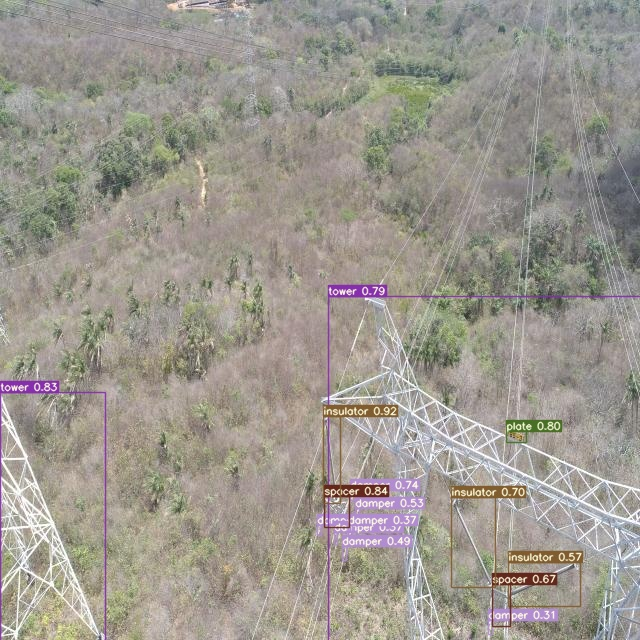

In [ ]:
from IPython.display import Image
Image(filename="runs/detect/exp6/DJI_0448_JPG.rf.cb2c6f4ac7f54e0d413a51b81680d9b9.jpg", width=640)